In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

> First, I made a mistake naming the data set! **It's 2015 data, not 2014 data.** But yes, still use `311-2014.csv`. You can rename it.

# Importing and preparing your data

Import your data, but **only the first 200,000 rows**. You'll also want to change the index to be a datetime based on the **Created Date** column - you'll want to check if it's already a datetime, and parse it if not.

In [21]:
#df = pd.read_csv('311-2010-2016.csv')
# We select a list of columns for a better efficiency
columns_list = ['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Borough']
df = pd.read_csv('311-2015.csv', nrows=200000, usecols= columns_list)


In [22]:
df['Created Date'].describe()

count                     200000
unique                    177667
top       05/04/2015 12:00:00 AM
freq                        1034
Name: Created Date, dtype: object

In [23]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

df['created_datetime'] = df['Created Date'].apply(parse_date)
df.index = df['created_datetime']
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Borough,created_datetime
created_datetime,,,,,,,,,
2015-07-06 10:58:27,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,QUEENS,2015-07-06 10:58:27
2015-07-03 13:26:29,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,MANHATTAN,2015-07-03 13:26:29


What was the **most popular type of complaint**, and how many times was it filed?

In [24]:
top_five_complaints = []
complaints_count = df['Complaint Type'].value_counts().head(5)
for complaint_type, count in complaints_count.items():
    top_five_complaints.append({"type": complaint_type, "count": count})

print("The most popular type of complaint is", top_five_complaints[0]['type'], "and it was filed", top_five_complaints[0]['count'], "times.")

The most popular type of complaint is Blocked Driveway and it was filed 21779 times.


Make a horizontal bar graph of the **top 5 most frequent complaint types**.

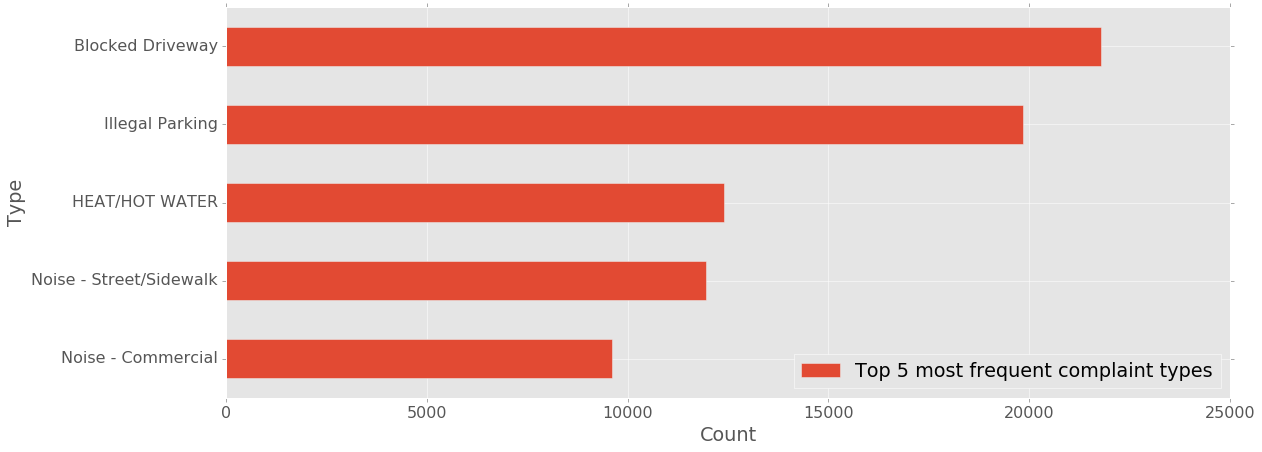

In [34]:
top5_df = pd.DataFrame(top_five_complaints)

top5_df.plot(kind='barh', x='type', y='count', label='Top 5 most frequent complaint types').invert_yaxis()
fig = plt.gcf()
fig.set_size_inches(18, 7, forward=True)
plt.xlabel("Count")
plt.ylabel("Type")

Which borough has the **most complaints per capita?** Since it's only 5 boroughs, you can do the math manually.

In [35]:
boroughs_dict_count = df.groupby(by='Borough')['Unique Key'].agg(['count']).to_dict()['count']
boroughs_dict_pop = {'BRONX': 1438159,
 'BROOKLYN': 2621793,
 'MANHATTAN': 1636268,
 'QUEENS': 2321580,
 'STATEN ISLAND': 47327}
complaints_per_capita = {}

for borough, count in boroughs_dict_count.items():
    if borough != 'Unspecified':
        complaints_per_capita[borough] = count/boroughs_dict_pop[borough]
#        print(borough.title(), "has", count/boroughs_dict_pop[borough], "complaints per capita.")

most_complaints_per_capita = max(complaints_per_capita, key=lambda i: complaints_per_capita[i])

answer = "{} has the most complaints per capita, with {:.3f} complaints per capita.".format(most_complaints_per_capita.title(), complaints_per_capita[most_complaints_per_capita])
print(answer)

Staten Island has the most complaints per capita, with 0.156 complaints per capita.


According to your selection of data, **how many cases were filed in March?** How about May?

In [36]:
print(len(df['2015-03']), "cases were filed in March.")
print(len(df['2015-05']), "cases were filed in May.")



15025 cases were filed in March.
49715 cases were filed in May.


I'd like to see all of the 311 complaints **called in on April 1st.**

> **Surprise!** We couldn't do this in class, but it was just a limitation of our data set

In [93]:
april_1 = df['2015-04-01']['Unique Key'].count()
april_1

573

What was the most popular type of complaint on April 1st?

What were the **most popular three types of complaint** on April 1st

In [38]:
print("The most popular three types of complaint on April 1st were:")
c = 1
for value, count in april_1['Complaint Type'].value_counts().iteritems(): # zip type
    if c > 3:
        break
    print("{}) {} ({} complaints)".format(c, value, count))
    c = c + 1

The most popular three types of complaint on April 1st were:
1) Illegal Parking (67 complaints)
2) Street Condition (64 complaints)
3) Blocked Driveway (58 complaints)


**What month has the most reports filed?** How many? Graph it.

In [42]:
# per_month = df.resample('M').size()
mdata = df.groupby([lambda x: x.month]).size() # this also works if there is multiple years

In [72]:
months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print(months_list[mdata.idxmax()-1], "has the most reports filed, with", mdata.max(), "reports.")

May has the most reports filed, with 49715 reports.


Reports filed per month:


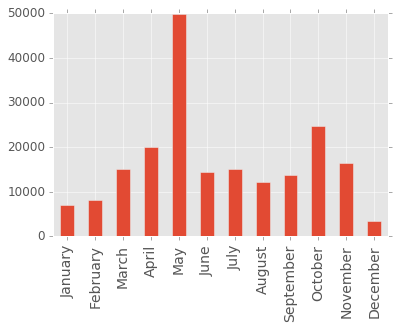

In [98]:
ax = mdata.plot(kind='bar')
plt.xticks(list(range(0,12)), months_list) # or: ax.set_xticklabels(months_list)
print('Reports filed per month:')

**What week of the year has the most reports filed?** How many? Graph the weekly complaints.

In [79]:
wdata = df.groupby([lambda x: x.week]).size()

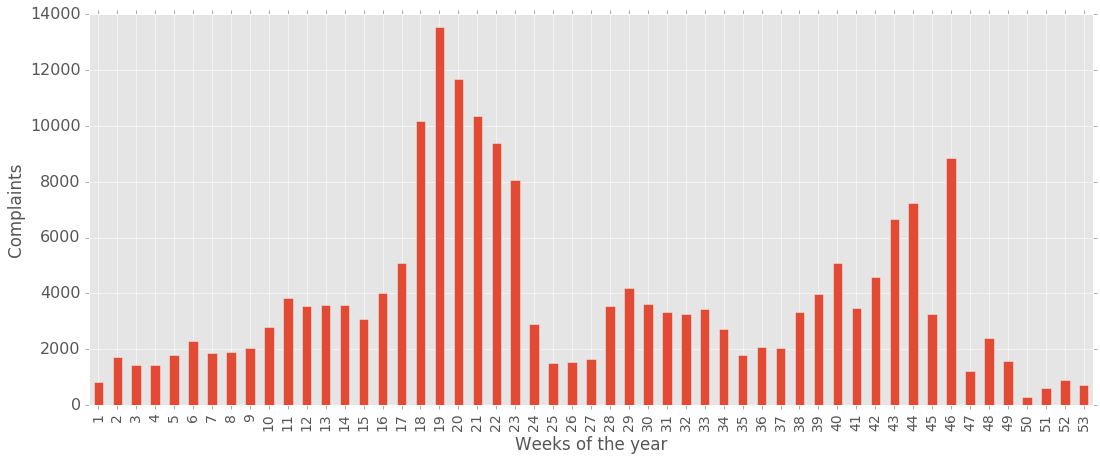

In [80]:
wdata.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(18, 7, forward=True)
plt.rcParams.update({'font.size': 14})
plt.rc('ytick', labelsize=12)
plt.ylabel('Complaints')
plt.xlabel('Weeks of the year')

Noise complaints are a big deal. Use `.str.contains` to select noise complaints, and make an chart of when they show up annually. **Then** make a chart about when they show up every day (cyclic).

In [99]:
noise_df = df[df['Complaint Type'].str.contains('Noise')]

Annual graph


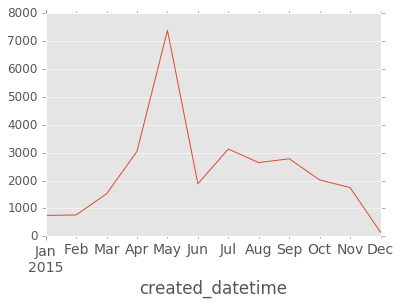

In [126]:
data_annual = noise_df.resample('M').size()
data_annual.plot()
print("Annual graph")

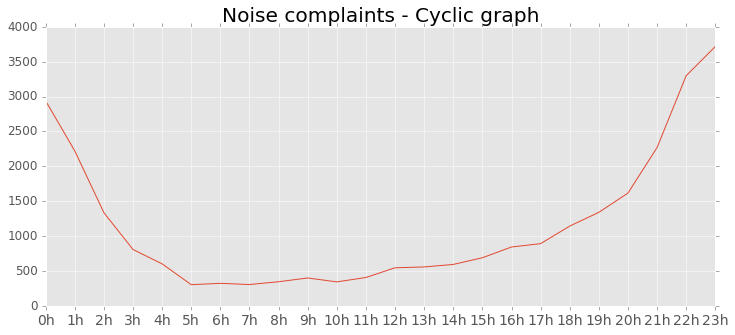

In [159]:
data_cyclic = noise_df.groupby([lambda x: x.hour]).size()
data_cyclic.plot(grid=True, title="Noise complaints - Cyclic graph")
fig = plt.gcf()
fig.set_size_inches(12, 5)
hours = list(range(0, 24))
hours_str = [str(i) + "h" for i in hours]
plt.xticks(hours, hours_str)
print('')

**Which were the top five days of the year for filing complaints?** How many on each of those days? Graph it.

In [143]:
ddata = df.groupby([lambda x: x.month, lambda x: x.day]).size()

In [144]:
days_top5 = ddata.sort_values(ascending=False).head(5)
days_top5_list = []
for day, count in days_top5.items():
    day_str = months_list[day[0]-1] + " " + str(day[1])
    print("-", day_str, "with", count, "complaints;")
    days_top5_list.append({"Day": day_str, "Count": count})

- October 28 with 2697 complaints;
- November 9 with 2529 complaints;
- May 4 with 2465 complaints;
- May 11 with 2293 complaints;
- October 29 with 2258 complaints;


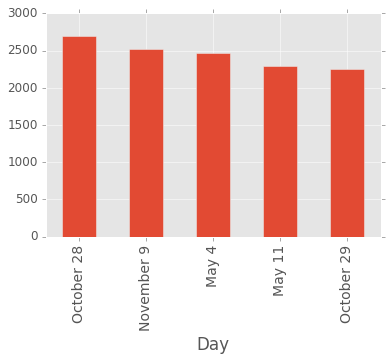

In [147]:
top5_df = pd.DataFrame(days_top5_list)
top5_df.plot(kind='bar', x='Day', y='Count', legend=False)

**What hour of the day are the most complaints?** Graph a day of complaints.

In [174]:
hdata = df.groupby([lambda x: x.hour]).size()
print(hdata.idxmax(), "hour has the most reports filed, with", hdata.max(), "reports filed.")

0 hour has the most reports filed, with 22427 reports filed.


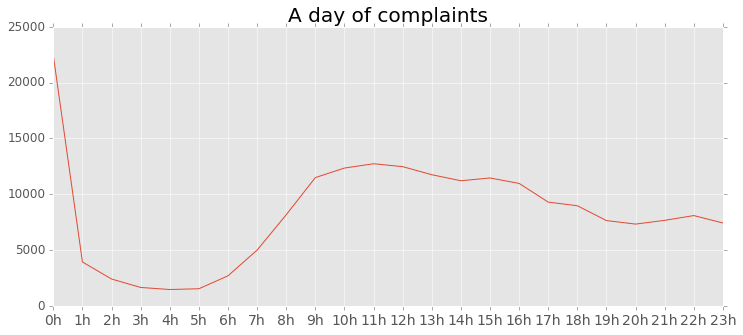

In [162]:
hdata.plot(title="A day of complaints", figsize=(12,5))
plt.xticks(hours, hours_str)
print('')

One of the hours has an odd number of complaints. What are the most common complaints at that hour, and what are the most common complaints the hour before and after?

In [283]:
# The odd number is midnight (very high peak)

type_per_h = pd.DataFrame(df.groupby([lambda x: x.hour])['Complaint Type'].value_counts())

print("0h, Top Counts of", type_per_h['Complaint Type'][0].head(3))

print("\n23h, Top Counts of", type_per_h['Complaint Type'][23].head(3))

print("\n01h, Top Counts of", type_per_h['Complaint Type'][1].head(3))

0h, Top Counts of Complaint Type
HEAT/HOT WATER    4534
Rodent            2112
PAINT/PLASTER     1946
Name: Complaint Type, dtype: int64

23h, Top Counts of Complaint Type
Noise - Street/Sidewalk    1599
Noise - Commercial         1503
Blocked Driveway            973
Name: Complaint Type, dtype: int64

01h, Top Counts of Complaint Type
Noise - Commercial         1025
Noise - Street/Sidewalk     897
Blocked Driveway            479
Name: Complaint Type, dtype: int64


So odd. What's the **per-minute breakdown** of complaints between 12am and 1am? You don't need to include 1am.

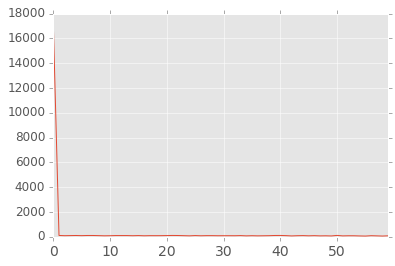

In [291]:
df_midnight = df[df.index.hour==0]
df_midnight = df_midnight.groupby(by=df_midnight.index.minute)
df_midnight['Unique Key'].count().plot()

Looks like midnight is a little bit of an outlier. Why might that be? Take the 5 most common agencies and graph the times they file reports at (all day, not just midnight).

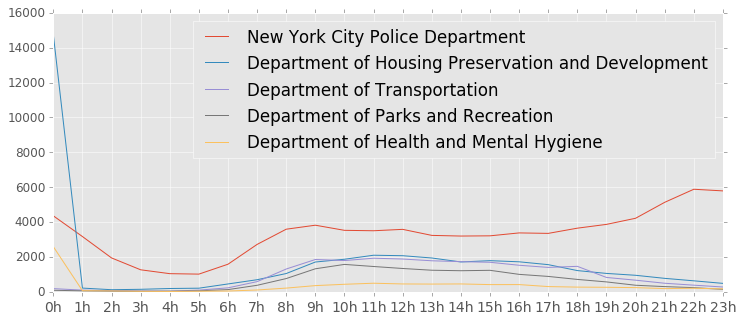

In [344]:
common_agencies = list(df['Agency Name'].value_counts().head(5).keys())
for agency in common_agencies:
    df_agency = df[df['Agency Name'] == agency]
    hdata = df_agency.groupby([lambda x: x.hour]).size()
    hdata.plot(legend=True, figsize=(12,5))
    plt.xticks(hours, hours_str)
plt.legend(common_agencies)
print('')

Graph those same agencies on an annual basis - make it **weekly**. When do people like to complain? When does the NYPD have an odd number of complaints?

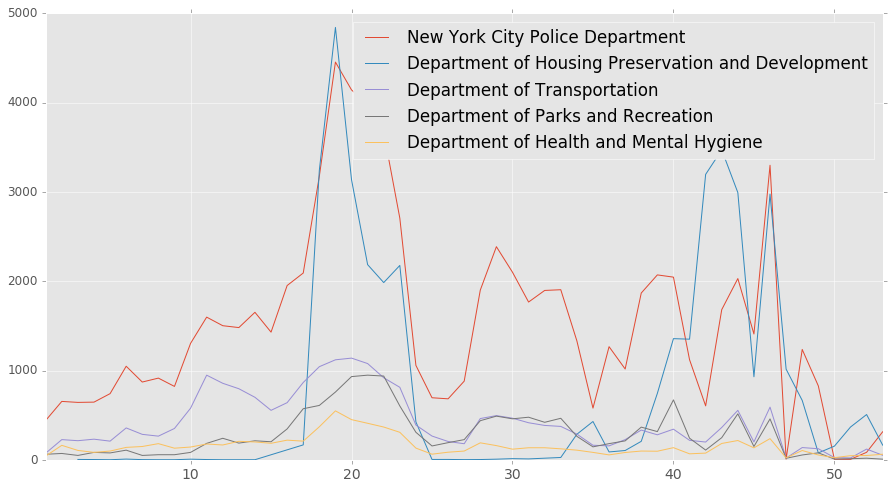

In [353]:
for agency in common_agencies:
    df_agency = df[df['Agency Name'] == agency]
    wdata = df_agency.groupby([lambda x: x.week]).size()
    wdata.plot(legend=True, figsize=(15,8))
plt.legend(common_agencies)
print('')

Maybe the NYPD deals with different issues at different times? Check the most popular complaints in July and August vs the month of May. Also check the most common complaints for the Housing Preservation Bureau (HPD) in winter vs. summer.

In [378]:
nypd = common_agencies[0]
hpd = common_agencies[1]

def complaints_for_agency(agency):
    return df[df['Agency Name'] == agency]

print("NYPD July-August:\n" + str(complaints_for_agency(nypd)['2015-07':'2015-08']['Complaint Type'].value_counts().head(10)))
print("\nNYPD May:\n" + str(complaints_for_agency(nypd)['2015-05']['Complaint Type'].value_counts().head(10)))

print("\nHPD Winter:\n" + str(complaints_for_agency(hpd)['2015-06-21':'2015-09-20']['Complaint Type'].value_counts().head(10)))
print("\nHPD Summer:\n" + str(complaints_for_agency(hpd)['2015-01-01':'2015-03-21']['Complaint Type'].value_counts().head(10)))



NYPD July-August:
Illegal Parking            3444
Blocked Driveway           3258
Noise - Street/Sidewalk    3165
Noise - Commercial         1201
Noise - Vehicle             942
Derelict Vehicle            904
Animal Abuse                406
Noise - Park                331
Homeless Encampment         275
Vending                     205
Name: Complaint Type, dtype: int64

NYPD May:
Blocked Driveway           4114
Illegal Parking            3975
Noise - Street/Sidewalk    3385
Noise - Commercial         2263
Noise - Vehicle            1232
Derelict Vehicle           1000
Animal Abuse                417
Vending                     337
Traffic                     335
Homeless Encampment         264
Name: Complaint Type, dtype: int64

HPD Winter:
UNSANITARY CONDITION    291
PAINT/PLASTER           182
PLUMBING                150
WATER LEAK               95
ELECTRIC                 87
FLOORING/STAIRS          86
DOOR/WINDOW              83
GENERAL                  80
HEAT/HOT WATER          